In [3]:
import sys
print (sys.path)
! where python
! python --version
! python3 --version
! pip show matplotlib

['d:\\random_repos\\numerical-analysis', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'C:\\Users\\daniel\\AppData\\Local\\Programs\\Python\\Python310', 'd:\\random_repos\\numerical-analysis\\.venv', '', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\win32', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\win32\\lib', 'd:\\random_repos\\numerical-analysis\\.venv\\lib\\site-packages\\Pythonwin']
D:\random_repos\numerical-analysis\.venv\Scripts\python.exe
C:\Users\daniel\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\daniel\AppData\Local\Microsoft\WindowsApps\python.exe
Python 3.10.7


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: d:\random_repos\numerical-analysis\.venv\lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 


## Terminology

- **Trial**: single occurrence with an outcome that is uncertain until we observe it.
For example, rolling a single die.
- **Outcome**: possible result of a trial; one particular state of the world. What Laplace calls a case.
For example: 4.
- **Sample Space**: The set of all possible outcomes for the trial.
For example, $\{1, 2, 3, 4, 5, 6\}$.
- **Event**: subset of the sample space, a set of outcomes that together have some property we are interested in.
For example, the event "odd die roll" is the set of outcomes $\{1,3,5\}$.
- **Probability**: As Laplace said, the probability of an event with respect to
  a sample space is the "number of favorable cases" (outcomes from the sample
  space that are in the event) divided by the "number of all the cases" in the
  sample space (assuming "nothing leads us to expect that any one of these cases
  should occur more than any other"), so $P \in [0,1]$.
  For example, the probability of an odd die roll is $3/6 = 1/2$.
- **Frequency**: non-negative number describing how often an outcome occurs. Can be a count like 5, or a ratio like 1/6.
- **Distribution**: mapping from outcome to frequency of that outcome. We will allow sample spaces to be distributions. 
- **Probability Distribution**: distribution whose frequencies sum to 1. 


## Introduction

Sampling table: 
  * with replacement: we can pick the same item again (rolling dice, coin flip)
  * without replacement: cannot choose again (pick a ball, team player...)


  &nbsp; | Order matters | Order doesn't matter
---------|----------|---------
 Replace | $n^k$ | $n+k-1 \choose k$
 Don't replace | $\frac{n!}{(n - k)!}$ | ${n \choose k} = \frac{n!}{(n - k)! \times k!}$

### die rolling implementation

In [4]:
from fractions import Fraction

def P(event, space):
    "The probability of an event, given a sample space."
    return Fraction(cases(favorable(event, space)),cases(space))

favorable = set.intersection # Outcomes that are in the event and in the sample space
cases     = len              # The number of cases is the length, or size, of a set

D     = {1, 2, 3, 4, 5, 6} # a sample space
even  = {   2,    4,    6} # an event
# NB: intersected with sample space to get favorable outcomes
odd   = {1, 3, 5, 7, 9, 11, 13}
prime = {2, 3, 5, 7, 11, 13}

In [5]:
P(even, D)

Fraction(1, 2)

In [6]:
P(odd, D)

Fraction(1, 2)

In [7]:
P((even | prime), D) # The probability of an even or prime die roll

Fraction(5, 6)

In [8]:
P((odd & prime), D) # The probability of an odd prime die roll

Fraction(1, 3)

### Card problems

In [9]:
import itertools
import random

def combos(items, n):
    "All combinations of n items; each combo as a space-separated str."
    return list(set(map(' '.join, itertools.combinations(items, n))))

suits = u'♥♠♦♣'
ranks = u'AKQJT98765432'
deck  = [r + s for r in ranks for s in suits] # 52
# sample space of all 5-card combinations from deck
Hands = combos(deck, 5) # 2598960

In [10]:
random.sample(Hands, 7)


['A♠ K♥ T♠ 4♥ 3♠',
 'A♦ Q♣ J♦ T♠ 5♣',
 'K♦ K♣ T♦ 6♣ 5♠',
 'K♦ 8♦ 6♠ 5♥ 3♣',
 'T♦ 8♦ 7♦ 5♠ 4♥',
 'A♥ A♣ J♥ 6♣ 2♠',
 'K♦ J♥ T♣ 8♠ 3♥']

In [11]:
random.sample(deck, 7)

['5♣', 'T♦', '3♣', '5♦', '8♥', '2♠', '6♦']

In [12]:
# 5 cards of the same suit
flush = {hand for hand in Hands if any(hand.count(suit) == 5 for suit in suits)}
P(flush, Hands)

Fraction(33, 16660)

In [13]:
four_kind = {hand for hand in Hands if any(hand.count(rank) == 4 for rank in ranks)}
P(four_kind, Hands) # e.g. 4 kings

Fraction(1, 4165)

## Urn Problems

> *An urn contains 6 blue, 9 red, and 8 white balls.  We select 6 balls at random. What is the probability of each of these  outcomes:*
> 
> - *All balls are red*.
> - *3 are blue, and 1 is red, and 2 are white, *.
> - *Exactly 4 balls are white*.

In [14]:
def balls(color, n):
    "A set of n numbered balls of the given color."
    return {color + str(i)
            for i in range(1, n + 1)}

urn = list(balls('B', 6) | balls('R', 9) | balls('W', 8))

U6 = combos(urn, 6) 
"""sample space (we select 6 random balls)"""

random.sample(U6, 1)

['W3 B5 W2 B4 B2 R2']

In [15]:
def select(color, n, space=U6):
    """
    The subset of the sample space with exactly `n` balls of given `color`.
    Example: `select('R', 6)` is the event of picking 6 red balls from the urn
    """
    return {s for s in space if s.count(color) == n}

In [16]:
# *All balls are red*.
P(select('R', 6), U6) 

Fraction(4, 4807)

In [17]:
# *3 are blue, and 1 is red, and 2 are white, *.
P(select('B', 3) & select('R', 1) & select('W', 2), U6)

Fraction(240, 4807)

In [18]:
# 4 balls (only) are white
P(select('W', 4), U6)


Fraction(350, 4807)

TODO: what about probability that 3 or more are white (not necessarily consecutive)? 

see
https://math.stackexchange.com/questions/1292902/the-probability-of-getting-at-least-5-balls-of-the-same-color-from-a-uniformly-d
which is basically the same exact problem.

we should first simplify the problem by grouping useless balls: i.e. combine blue
and red as "?".

The probability of any of the _+3 white balls_ event
(WWW???, ?W?WW?, ??WWW?, ...) is based on order matters without replacement




### Verifying urn calculations with arithmetic

Let's verify the first question of drawing exactly 6 red balls.

We need to first answer _how many ways can I choose 6 out of 9 red balls?_

$$
6 \choose 9
$$

If we care about the order in which they're drawn, the number of ways of choosing $k$ out of $n$ items is:

$$
\frac{n!}{(n - k)!}
$$

But if we don't care about the *order* of the six drawn balls, we can divide
that product by the number of permutations of 6 things, i.e. 6:

$$
\frac{n!}{(n - k)! \times k!} = {n \choose k}
$$





In [19]:
from math import factorial

def choose(n, k):
    "Number of ways to choose k items from a list of n items without taking order into account."
    return factorial(n) // (factorial(n - k) * factorial(k))

choose(9, 6)

84

In [20]:
N = len(U6)

# `P` computes a ratio and `choose` computes a count,
# so we can multiply the probability back by the denominator `cases(space)`, i.e. len(U6) 
# so that both are counts.
print(N * P(select('R', 6), U6) == choose(9, 6))
# which is just:
print(len(favorable(select('R', 6), U6)) == choose(9, 6))

True
True


In [21]:
# 3 are blue, and 1 is red, and 2 are white

N * P(select('B', 3) & select('W', 2) & select('R', 1), U6) == choose(6, 3) * choose(9, 1) * choose(8, 2) 

True

In [22]:
# 4 balls (only) are white
N * P(select('W', 4), U6) == choose(8, 4) * choose(6 + 9, 2)  # (6 + 9 non-white balls)

True

In [23]:
from collections import Counter
        
class Dist(Counter): 
    "A Distribution of {outcome: frequency} pairs."

# Changes to previous functions to allow use of distributions (via `Dist`):
#   - Sample spaces and events can both be specified as either a `set` or a `Dist`.
#   - The sample space can be a non-probability distribution like `Dist(H=50, T=50)`; the results
#   will be the same as if the sample space had been a true probability distribution like `Dist(H=1/2, T=1/2)`.
#   - `cases` now sums the frequencies in a distribution (it previously counted the length).
#   - `favorable` now returns a `Dist` of favorable outcomes and their frequencies (not a `set`).
#   - Redefines `Fraction` to use `"/"`, not `fractions.Fraction`, because frequencies might be floats.
#   - `P` is unchanged.

def cases(outcomes): 
    "The total frequency of all the outcomes."
    return sum(Dist(outcomes).values())

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    space = Dist(space)
    return Dist({x: space[x] 
                for x in space if x in event})

def Fraction(n, d): return n / d
    
# multiple ways to define a distribution
assert Dist(H=5, T=4) == Dist({'H': 5}, T=4) == Dist('TTTT', H=5) == Dist('THHHTTHHT')

# Example: probability of rolling an even number with a crooked die that is loaded to prefer 6:
Crooked = Dist({1: 0.1, 2: 0.1, 3: 0.1, 4: 0.1, 5: 0.1, 6: 0.5})
P(even, Crooked) # now using new versions of cases, favorable and Fraction


0.7

In [24]:
# vs getting an odd
P(odd, Crooked) # now using new versions of cases, favorable and Fraction


0.30000000000000004

### Allowing predicates to be used as events

To calculate the probability of an even die roll, we've been using

even = {2, 4, 6}

Which makes us alter the events if we were to change the die face number.

It is much more practical to allow events to be computed in this case and
redefine `favorable` once again:

In [25]:
def even(n): return n % 2 == 0

def favorable(event, space):
    "A distribution of outcomes from the sample space that are in the event."
    if callable(event):
        event = {x for x in space if event(x)}
    space = Dist(space)
    return Dist({x: space[x] 
                 for x in space if x in event})
    
favorable(even, D)

Dist({2: 1, 4: 1, 6: 1})

In [26]:
P(even, D)

0.5

The sample space (die) can also we computed dynamically:

In [27]:
def die(n): return set(range(1, n + 1))

favorable(even, die(12))

Dist({2: 1, 4: 1, 6: 1, 8: 1, 10: 1, 12: 1})

In [28]:
P(even, die(12))

0.5

In [29]:
P(even, die(2000))

0.5

In [30]:
P(even, die(2001))

0.49975012493753124

In [31]:
#
# Calculate the probability that the sum of rolling `d` 6-sided dice is prime:
#

def sum_dice(d): return Dist(sum(dice) for dice in itertools.product(D, repeat=d))

def is_prime(n): return (n > 1 and not any(n % i == 0 for i in range(2, n)))

for d in range(1, 9):
    p = P(is_prime, sum_dice(d))
    print(f"P(is_prime, sum_dice({d})) = {round(p, 3)}")

P(is_prime, sum_dice(1)) = 0.5
P(is_prime, sum_dice(2)) = 0.417
P(is_prime, sum_dice(3)) = 0.338
P(is_prime, sum_dice(4)) = 0.333
P(is_prime, sum_dice(5)) = 0.317
P(is_prime, sum_dice(6)) = 0.272
P(is_prime, sum_dice(7)) = 0.242
P(is_prime, sum_dice(8)) = 0.236


### Coin toss game (Fermat & Pascal)

Consider a gambling game consisting of tossing a coin repeatedly. 
Player H wins the game as soon as a total of 10 heads come up, and T wins if a
total of 10 tails come up before H wins. 
If the game is interrupted when H has 8 heads and T has 7 tails, 
how should the pot of money (which happens to be 100 Francs) be split?

In [32]:
def win_unfinished_game(h, t):
    "The probability that H will win the unfinished game, given the number of points `h` and `t` needed by H and T to win."
    return P(at_least(h, 'h'), finishes(h, t))

def at_least(n, item):
    "The event of getting at least n instances of item in an outcome."
    return lambda outcome: outcome.count(item) >= n
    
def finishes(h, t):
    "All finishes of a game where player H needs h points to win and T needs t."
    tosses = ['ht'] * (h + t - 1)
    return set(itertools.product(*tosses))

In [33]:
endings = finishes(2, 3) # current state, where H needs 2 coin tosses to win and T needs 3
# 16 equiprobable endings
endings

{('h', 'h', 'h', 'h'),
 ('h', 'h', 'h', 't'),
 ('h', 'h', 't', 'h'),
 ('h', 'h', 't', 't'),
 ('h', 't', 'h', 'h'),
 ('h', 't', 'h', 't'),
 ('h', 't', 't', 'h'),
 ('h', 't', 't', 't'),
 ('t', 'h', 'h', 'h'),
 ('t', 'h', 'h', 't'),
 ('t', 'h', 't', 'h'),
 ('t', 'h', 't', 't'),
 ('t', 't', 'h', 'h'),
 ('t', 't', 'h', 't'),
 ('t', 't', 't', 'h'),
 ('t', 't', 't', 't')}

In [34]:
# of which 11 are favorable to player H who needs 2 tosses
favorable(at_least(2, 'h'), endings)

Dist({('h', 'h', 'h', 'h'): 1,
      ('h', 't', 't', 'h'): 1,
      ('h', 'h', 'h', 't'): 1,
      ('t', 'h', 'h', 'h'): 1,
      ('t', 'h', 't', 'h'): 1,
      ('t', 'h', 'h', 't'): 1,
      ('t', 't', 'h', 'h'): 1,
      ('h', 't', 'h', 't'): 1,
      ('h', 'h', 't', 't'): 1,
      ('h', 't', 'h', 'h'): 1,
      ('h', 'h', 't', 'h'): 1})

In [35]:
# and of course only 16 - 11 are favorable to player T
favorable(at_least(3, 't'), endings)

Dist({('t', 't', 't', 'h'): 1,
      ('t', 't', 't', 't'): 1,
      ('h', 't', 't', 't'): 1,
      ('t', 'h', 't', 't'): 1,
      ('t', 't', 'h', 't'): 1})

In [36]:
# If we need to justly split 100 currency artefacts between the two players, H will get:
100 * win_unfinished_game(2, 3)

68.75

In [37]:
for t_tosses_to_win in reversed(range(10)):
    print(f"H needs 2 tosses, T needs {t_tosses_to_win} tosses - H gets: {round(100 * win_unfinished_game(2, t_tosses_to_win), 2)}%")

H needs 2 tosses, T needs 9 tosses - H gets: 98.93%
H needs 2 tosses, T needs 8 tosses - H gets: 98.05%
H needs 2 tosses, T needs 7 tosses - H gets: 96.48%
H needs 2 tosses, T needs 6 tosses - H gets: 93.75%
H needs 2 tosses, T needs 5 tosses - H gets: 89.06%
H needs 2 tosses, T needs 4 tosses - H gets: 81.25%
H needs 2 tosses, T needs 3 tosses - H gets: 68.75%
H needs 2 tosses, T needs 2 tosses - H gets: 50.0%
H needs 2 tosses, T needs 1 tosses - H gets: 25.0%
H needs 2 tosses, T needs 0 tosses - H gets: 0.0%


> Which of the following three propositions has the greatest chance of success? 
> 1. Six fair dice are tossed independently and at least one “6” appears. 
> 2. Twelve fair dice are tossed independently and at least two “6”s appear. 
> 3. Eighteen fair dice are tossed independently and at least three “6”s appear.

In [38]:
die6 = Dist({6: 1/6, '?': 5/6}) # we don't care about other possibilities

# dice rollings are independent from one another. So are coin flips. 
# Would not apply to e.g. removing balls from bags, etc. where order matters
# When order matters -> conditional probability is what we're looking at.
def joint(A, B, combine='{}{}'.format):
    """The joint distribution of two independent and identical distributions (IID). 
    Result is all entries of the form {'ab': frequency(a) * frequency(b)}"""
    return Dist({combine(a, b): A[a] * B[b]
                 for a in A for b in B})
    
def dice_prob(n, die):
    "Joint probability distribution from rolling `n` dice."
    if n == 1:
        return die
    else:
        return joint(die, dice_prob(n - 1, die))
    
dice_prob(4, die6)

Dist({'6666': 0.0007716049382716049,
      '666?': 0.0038580246913580245,
      '66?6': 0.0038580246913580245,
      '66??': 0.019290123456790126,
      '6?66': 0.0038580246913580245,
      '6?6?': 0.019290123456790126,
      '6??6': 0.019290123456790126,
      '6???': 0.09645061728395063,
      '?666': 0.0038580246913580245,
      '?66?': 0.019290123456790122,
      '?6?6': 0.019290123456790122,
      '?6??': 0.09645061728395063,
      '??66': 0.019290123456790122,
      '??6?': 0.09645061728395063,
      '???6': 0.09645061728395063,
      '????': 0.48225308641975323})

In [39]:
# going back to the original question:
print(P(at_least(1, '6'), dice_prob(6, die6)), "<-- we're better off rolling six dice and hoping for 1 six") 
print(P(at_least(2, '6'), dice_prob(12, die6)))
print(P(at_least(3, '6'), dice_prob(18, die6)))

0.665102023319616 <-- we're better off rolling six dice and hoping for 1 six
0.61866737373231
0.5973456859477678


Allen Downey's M&MS:

> The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it > was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 
> A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One > is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

In [40]:
bag94 = Dist(brown=30, yellow=20, red=20, green=10, orange=10, tan=10)
bag96 = Dist(blue=24, green=20, orange=16, yellow=14, red=13, brown=13)
MM = joint(bag94, bag96, '94:{} 96:{}'.format)
MM

Dist({'94:brown 96:blue': 720,
      '94:brown 96:green': 600,
      '94:brown 96:orange': 480,
      '94:brown 96:yellow': 420,
      '94:brown 96:red': 390,
      '94:brown 96:brown': 390,
      '94:yellow 96:blue': 480,
      '94:yellow 96:green': 400,
      '94:yellow 96:orange': 320,
      '94:yellow 96:yellow': 280,
      '94:yellow 96:red': 260,
      '94:yellow 96:brown': 260,
      '94:red 96:blue': 480,
      '94:red 96:green': 400,
      '94:red 96:orange': 320,
      '94:red 96:yellow': 280,
      '94:red 96:red': 260,
      '94:red 96:brown': 260,
      '94:green 96:blue': 240,
      '94:green 96:green': 200,
      '94:green 96:orange': 160,
      '94:green 96:yellow': 140,
      '94:green 96:red': 130,
      '94:green 96:brown': 130,
      '94:orange 96:blue': 240,
      '94:orange 96:green': 200,
      '94:orange 96:orange': 160,
      '94:orange 96:yellow': 140,
      '94:orange 96:red': 130,
      '94:orange 96:brown': 130,
      '94:tan 96:blue': 240,
      '94:tan 96

In [41]:
# we observe that one is yellow and one is green (event)
def yellow_and_green(outcome): return 'yellow' in outcome and 'green' in outcome

# note we now pass a predicate to favorable to filter favorable outcomes
favorable(yellow_and_green, MM)

Dist({'94:yellow 96:green': 400, '94:green 96:yellow': 140})

In [42]:
# What is the probability that the yellow M&M came from the 1994 bag? (event)
def yellow94(outcome): return '94:yellow' in outcome

# P now also accepts a predicate as event, since `favorable` is used underneath
P(yellow94, favorable(yellow_and_green, MM))

0.7407407407407407

Answering this question was straightforward: just like all the other probability
problems, we simply create a sample space, and use `P` to pick out the
probability of the event in question, given what we know about the outcome.

Of course, we *could* solve it using Bayes Theorem. 
Why is Bayes Theorem recommended? 
Because we are **asked about the probability of an outcome given the evidence**&mdash;the probability the yellow came from the 94 bag, given that there is a yellow and a green. But the problem statement doesn't directly tell us the probability of that outcome given the evidence; it just tells us the probability of the evidence given the outcome. 

Before we see the colors of the M&Ms, there are two hypotheses, `A` and `B`, both with equal probability:

    A: first M&M from 94 bag, second from 96 bag
    B: first M&M from 96 bag, second from 94 bag
    P(A) = P(B) = 0.5
    
Then we get some evidence:
    
    E: first M&M yellow, second green
    
We want to know the probability of hypothesis `A`, given the evidence:
    
    P(A | E)
    
That's not easy to calculate (except by enumerating the sample space, which our `P` function does). But Bayes Theorem says:
    
    P(A | E) = P(E | A) * P(A) / P(E)
    
The quantities on the right-hand-side are easier to calculate:
    
    P(E | A) = 0.20 * 0.20 = 0.04
    P(E | B) = 0.10 * 0.14 = 0.014
    P(A)     = 0.5
    P(B)     = 0.5
    P(E)     = P(E | A) * P(A) + P(E | B) * P(B) 
             = 0.04     * 0.5  + 0.014    * 0.5   =   0.027
    
And we can get a final answer:
    
    P(A | E) = P(E | A) * P(A) / P(E) 
             = 0.04     * 0.5  / 0.027 
             = 0.7407407407
             
You have a choice: Bayes Theorem allows you to do less calculation at the cost
of more algebra; that is a great trade-off if you are working with pencil and
paper. Enumerating the sample space allows you to do less algebra at the cost of
more calculation; usually a good trade-off if you have a computer. But
regardless of the approach you use, it is important to understand Bayes theorem
and how it works.


# The Central Limit Theorem 

In [43]:
%matplotlib inline 
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1): return random.normalvariate(mu, sigma)

def repeated_hist(dist, n=10**6, bins=100):
    "Sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)]
    plt.hist(samples, bins=bins, density=True)
    plt.title('{} (μ = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([], '')
    plt.show()

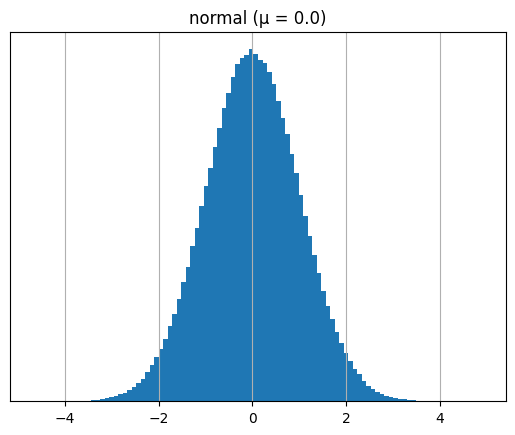

In [44]:
# Normal distribution
repeated_hist(normal)


## References

- Peter Norvig's [ipynb](https://github.com/norvig/pytudes/blob/main/ipynb)


## Resources and recommended reading

- Statistics in a nutshell
- All of Statistics